# Introduction: Critical temperature of superconductors task

Явление сверхпроводимость одно из самых удивительных по своей природе, но объяснить его с классической точки зрения невозможно.
Данное явление было открыто голландским физиком Хейке Камерлинг-Оннес в 1911 году.

Сверхпроводимость — свойство некоторых веществ и материалов, электрическое сопротивление которых при понижении температуры до определенного уровня падает до нуля. Сверхпроводимость возникает скачком при понижении температуры. Температура при которой возникает скачок называется критической температурой.

Несмотря на то, что сверхпроводимость была открыта больше века назад, многие её свойства плохо изучены, например, связь между сверхпроводимостью и химическими/структурными свойствами материалов.

Вам предлагается разработать алгоритмы машинного обучения, которые позволяют установить связь между химическим составом, различными свойствами сверхпроводниками и их критической температурой.

P.s.
Все задачи были разработаны и созданы для Samsung Innovation Campus Bootcamp: Классическое машинное обучение.
Данные были собраны как из открытых источников, так и сгенерированы самостоятельно.


## Data

Данные о сверхпроводниках взяты из базы данных сверхпроводящих материалов, собранной Национальным институтом материаловедения Японии NIMS.
Данные содержат сведения о 21 263 сверхпроводников.

* Тренировочный набор - 17 010 строк.
* Тестовый набор - 4 253 строк.

Для каждого сверхпроводника в данных приведены полная химическая формула сверхпроводника, а также 8 основных химических свойств (абсолютное значение, среднее, взвешенное среднее и так далее): атомная масса, энергия ионизации, радиус атома, плотность, удельная теплота плавления, энергия сродства к электрону, теплопроводность, валентность.

### Files

* train.csv - набор тренировочных данных, содержащих различные свойства суперпроводников
* formula_train.csv - набор тренировочных данных, содержащих химический состав суперпроводников
* test.csv - набор тестовых данных, содержащих различные свойства суперпроводников
* formula_test.csv - набор тестовых данных, содержащих химический состав суперпроводников

### Metric: Mean squared error (MSE)

Так как мы будем решать задачу регрессии, одной из базовых функций ошибки является среднеквадратичная ошибка, которая выглядит следующим образом:

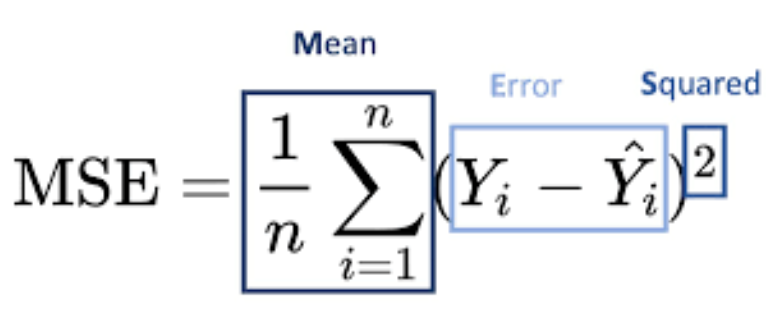

### Improrts and loading data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [39]:
train_df = pd.read_csv("../Notebooks/Dataset/critical-temperature-of-superconductors/train.csv")
test_df = pd.read_csv("../Notebooks/Dataset/critical-temperature-of-superconductors/test.csv")

formula_train_df = pd.read_csv("../Notebooks/Dataset/critical-temperature-of-superconductors/formula_train.csv")
formula_test_df = pd.read_csv("../Notebooks/Dataset/critical-temperature-of-superconductors/formula_test.csv")
train_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


## Exploratory Data Analysis (EDA)

Исследовательский анализ данных (EDA) — это открытый процесс, в ходе которого мы рассчитываем статистические данные и составляем цифры, чтобы найти тенденции, аномалии, закономерности или взаимосвязи в данных. Цель EDA — узнать, что могут нам сказать наши данные. Обычно он начинается с общего обзора, а затем сужается до конкретных областей по мере того, как мы находим интригующие области данных. Результаты могут быть интересны сами по себе или могут быть использованы для обоснования нашего выбора при моделировании, например, помогая нам решить, какие функции использовать.

In [40]:
train_df['critical_temp'].value_counts().head(15)

critical_temp
80.0    113
20.0    105
90.0    100
40.0     97
30.0     94
25.0     85
35.0     85
32.0     82
92.0     81
78.0     80
86.0     78
10.0     77
15.0     76
6.0      75
4.0      73
Name: count, dtype: int64

In [41]:
train_df['critical_temp'].value_counts().tail(15)

critical_temp
6.855      1
2.295      1
2.865      1
4.950      1
3.955      1
5.230      1
106.700    1
126.800    1
20.860     1
1.506      1
0.039      1
6.980      1
21.140     1
25.610     1
22.380     1
Name: count, dtype: int64

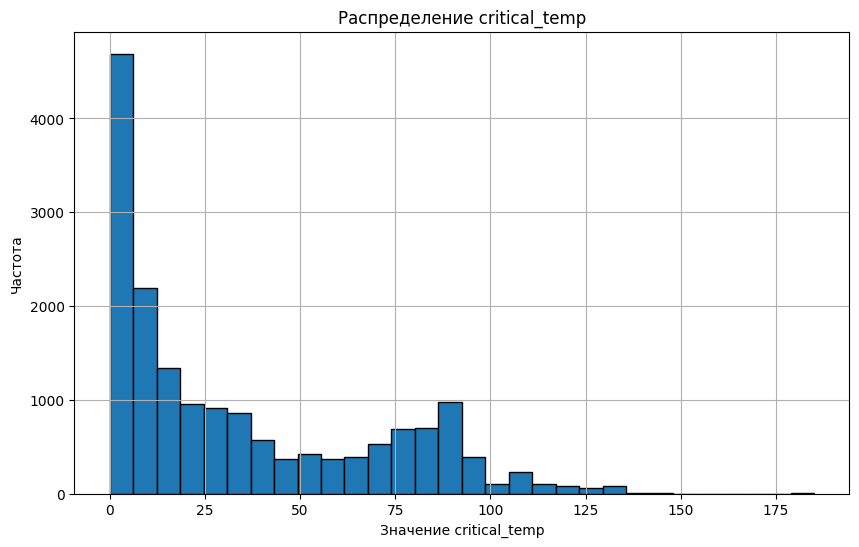

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['critical_temp'], bins=30, edgecolor='black')
plt.title('Распределение critical_temp')
plt.xlabel('Значение critical_temp')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [64]:
pd.set_option('display.max_rows', 8)
train_df['critical_temp'].describe

<bound method NDFrame.describe of 0         29.00
1         26.00
2         19.00
3         22.00
          ...  
17006    122.10
17007      1.98
17008      1.84
17009     12.80
Name: critical_temp, Length: 17010, dtype: float64>

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

## Check for correlations

In [45]:
correlations = train_df.corr()['critical_temp'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 wtd_entropy_FusionHeat         0.562708
entropy_fie                    0.568254
wtd_std_fie                    0.584195
wtd_entropy_Valence            0.589791
entropy_Valence                0.599583
wtd_std_atomic_radius          0.600576
number_of_elements             0.601792
wtd_entropy_atomic_radius      0.603332
range_fie                      0.604288
wtd_entropy_atomic_mass        0.626545
std_ThermalConductivity        0.652652
range_atomic_radius            0.655900
range_ThermalConductivity      0.686461
wtd_std_ThermalConductivity    0.720447
critical_temp                  1.000000
Name: critical_temp, dtype: float64

Most Negative Correlations:
 wtd_mean_Valence            -0.632833
wtd_gmean_Valence           -0.616134
mean_Valence                -0.601103
gmean_Valence               -0.574112
gmean_Density               -0.541877
wtd_gmean_Density           -0.539379
wtd_range_Valence           -0.439875
wtd_gmean_FusionHeat        -0.434945
g

In [46]:
unique_values = train_df.nunique()
pd.set_option('display.max_rows', None)

print(unique_values)

number_of_elements                     9
mean_atomic_mass                    3125
wtd_mean_atomic_mass               12575
gmean_atomic_mass                   3125
wtd_gmean_atomic_mass              12575
entropy_atomic_mass                 3075
wtd_entropy_atomic_mass            12524
range_atomic_mass                    998
wtd_range_atomic_mass              10618
std_atomic_mass                     3074
wtd_std_atomic_mass                12467
mean_fie                            2809
wtd_mean_fie                       12411
gmean_fie                           3059
wtd_gmean_fie                      12524
entropy_fie                         3012
wtd_entropy_fie                    12490
range_fie                            822
wtd_range_fie                      10302
std_fie                             2966
wtd_std_fie                        12392
mean_atomic_radius                   920
wtd_mean_atomic_radius             10461
gmean_atomic_radius                 2932
wtd_gmean_atomic

It seems like theres not much to do here. The whole data is fully prepared for the reading

## Data preprocessing

In [47]:
formula_train_df = formula_train_df.drop(columns=['critical_temp'])

train_full = pd.concat([train_df, formula_train_df], axis=1)

print(f"Full Train dataset shape: {train_full.shape}")

Full Train dataset shape: (17010, 169)


In [48]:
train_full.drop(columns=['material'], inplace=True)

In [49]:
train_full.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [50]:
X = train_full.drop(columns=['critical_temp'])
y = train_full['critical_temp']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (17010, 167)
Target shape: (17010,)


In [51]:
test_full = pd.concat([test_df, formula_test_df], axis=1)

print(f"Full Train dataset shape: {test_full.shape}")

Full Train dataset shape: (4253, 168)


In [52]:
test_full.drop(columns=['material'], inplace=True)

## Train model

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset shape: {X_train.shape}, {y_train.shape}')
print(f'Test dataset shape: {X_test.shape}, {y_test.shape}')

Train dataset shape: (11907, 167), (11907,)
Test dataset shape: (5103, 167), (5103,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [55]:
print('Веса всех признаков (w1, ..., w167): ', model.coef_)
print('Свободный коэффициент уравнения w0: ', model.intercept_)

Веса всех признаков (w1, ..., w167):  [ 2.12805287e-01  9.72525002e-01 -1.47183783e+00 -5.37955649e-01
  9.78134096e-01 -2.62246535e+01  3.20118727e+00  1.62100909e-01
  1.09700504e-01 -4.88611671e-01  1.20196686e-01 -1.25057809e-01
 -6.52023150e-02  1.05278896e-01  1.13520933e-01 -2.63854184e+01
  5.51023964e+01  3.32088514e-02  1.88145236e-02 -4.60044809e-02
 -4.88770422e-02 -1.21394058e+00  3.27218622e+00  1.03716109e+00
 -3.01885289e+00 -1.27587380e+01  1.22389781e+01  1.19441180e-01
 -8.96135057e-02 -2.32241433e-01 -2.83335454e-01 -5.01572138e-03
  4.60941892e-03  4.45664993e-04 -5.30138989e-04 -8.00743002e-01
 -2.35637312e+00 -9.40130907e-04 -5.17875121e-04  2.75676857e-03
 -6.95724362e-04 -8.45116767e-02  3.57696621e-01  1.53970521e-01
 -4.39642275e-01  1.36514620e+01 -2.01014527e+01 -3.46735477e-01
 -7.38137918e-02  1.24714581e+00 -5.31497653e-01  9.68410020e-01
 -1.65053084e+00 -8.05772515e-01  1.33015883e+00 -1.57283739e+01
  2.16159282e+01 -1.21096452e-01  5.30349151e-01 -7.

Now it's time to see the metrics

In [56]:
y_pred = model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  13.312505110179417
MSE:  2099.6729508564795


## Crossvalidation

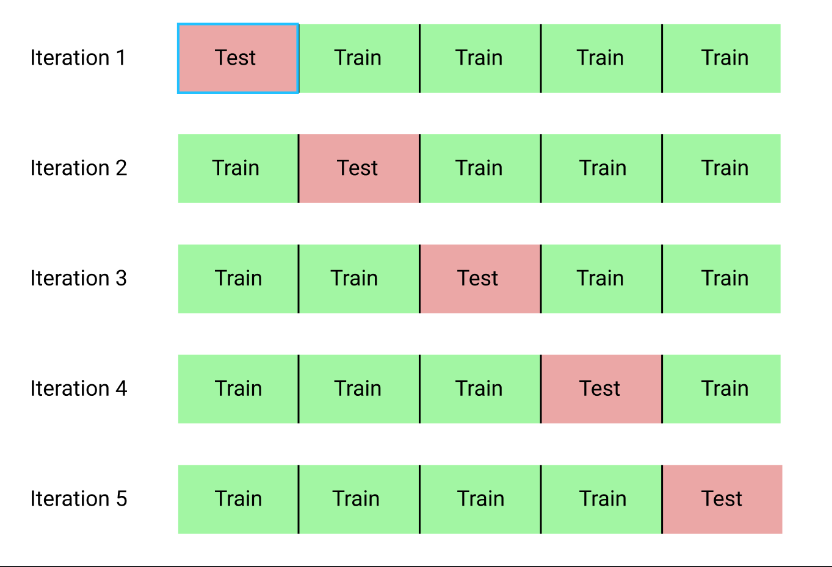

In [57]:
from sklearn.model_selection import KFold, cross_val_score

num_folds = 6
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print(scores)
print(scores.mean())

[ 0.7530621   0.74108128  0.77520615 -0.97496811  0.76680892  0.04657886]
0.35129486774883395


In [58]:
def fit_and_evaluate(model):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    model_mae = mean_absolute_error(y_test, y_pred)
    model_mse = mean_squared_error(y_test, y_pred)
  
    return model_mae, model_mse

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

random_forest = RandomForestRegressor(random_state=42)
random_forest_metrics = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_metrics[0])

Random Forest Regression Performance on the test set: MAE = 5.4639


## Save the solution

In [60]:
y_pred_test = final_model.predict(test_full)

In [65]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("../Notebooks/solution.csv", index=False)